## Hypothesis Testing for H7 and H8

Hypothesis 1: Hackathons with explicit gender diversity initiatives have a higher rate of participation from women than those hackathons without such initiatives.

Hypothesis 2: Hackathons that promote “learning” in their DevPost description pages attract higher participation of women as compared to those hackathons without such initiatives.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
from scipy import stats

In [4]:
from collections import Counter

In [5]:
hackathons = pd.read_csv('../data/hackathons_final_post_stats.csv')
participants_expanded = pd.read_csv('../data/participants_new_post_stats.csv')

In [6]:
hackathons.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'URL', 'Judging Criteria', 'schedule',
       'hack_type', 'info', 'start_date_format', 'end_date_format', 'Prizes',
       'prize_money', 'Id', 'Title', 'Location', 'start_date', 'end_date',
       'year', 'themes', 'prize', 'registered_N', 'featured',
       'organization_name', 'winners_announced', 'submission_gallery_url',
       'start_a_submission_url', 'Subtitles', 'Sponsors', 'Judges',
       'Eligibility', 'Requirements', 'females_participating',
       'males_participating', 'unknown_gender_participating',
       'actual_participants_N', 'participation_type', 'prize_money_status',
       'duration_days', 'combined_text', 'classification_method1',
       'classification_method2', 'classification_method3',
       'classification_method4', 'classification_method5'],
      dtype='object')

In [7]:
parts_first = pd.read_csv("../data/part_first_hackathon.csv")

In [8]:
parts_first = parts_first.merge(hackathons, left_on=["hackathon"], right_on=["URL"], how="left")

In [31]:
parts_first["start_date_format"]

0        2010-08-11
1        2010-08-11
2        2010-08-11
3        2010-08-11
4        2010-04-20
            ...    
56410    2022-02-05
56411    2022-04-23
56412    2022-06-25
56413    2022-02-19
56414    2022-01-28
Name: start_date_format, Length: 56415, dtype: object

In [45]:
hackathons["year"] = hackathons["start_date_format"].map(lambda x:int(x[:4]))

In [40]:
set(parts_first["year"])

{2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022}

In [38]:
Counter(parts_first["classification_method4"])

Counter({'No explicit gender diversity initiative': 53024,
         'Women-encouraged': 2678,
         'Women-targeted': 713})

In [35]:
Counter(parts_first.loc[parts_first["classification_method4"]!="No explicit gender diversity initiative"]["gender"])

Counter({'m': 1387, 'f': 1807, 'unknown': 197})

In [42]:
year = Counter(parts_first.loc[parts_first["classification_method4"]!="No explicit gender diversity initiative"]["year"])


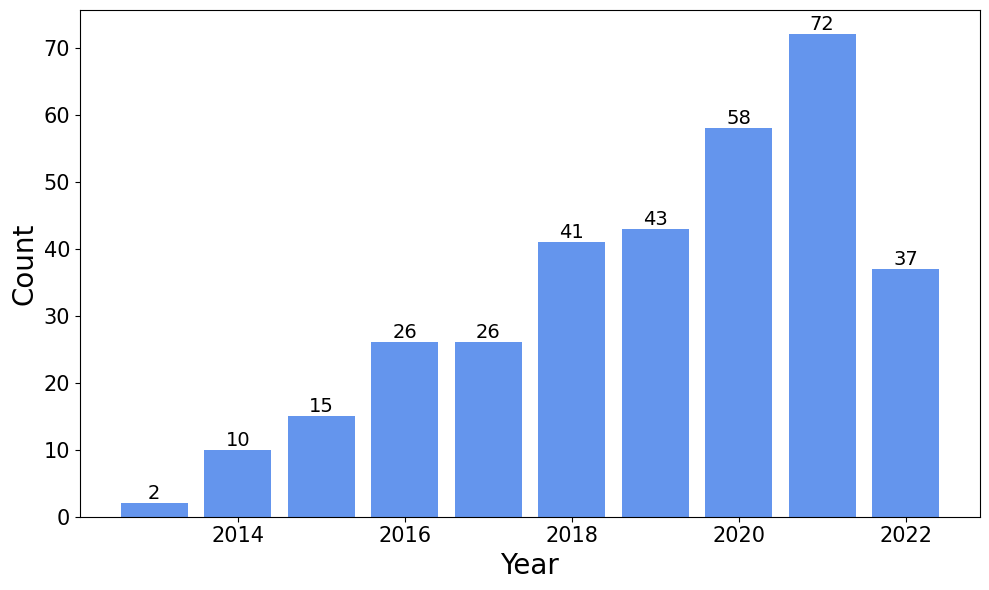

In [46]:
year = Counter(hackathons.loc[hackathons["classification_method4"]!="No explicit gender diversity initiative"]["year"])

# Separate the keys (years) and values (counts)
years = list(year.keys())
counts = list(year.values())

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust size if needed
bars = plt.bar(years, counts, color='cornflowerblue')

# Adding labels and title
plt.xlabel("Year", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.bar_label(bars, fontsize=14)
# plt.title("Hackathon Counts by Year")

# Show the plot
plt.tight_layout()
plt.savefig("../results/gdi_year.pdf")
plt.show()

## HYPOTHESIS 9:

In [14]:
## Method 1:
# Analyze classification counts
classification_counts = hackathons['classification_method1'].value_counts()
print(classification_counts)

## Method 2:
classification_counts = hackathons['classification_method2'].value_counts()
print(classification_counts)

## Method 3:
classification_counts = hackathons['classification_method3'].value_counts()
print(classification_counts)

## Method 4:
classification_counts = hackathons['classification_method4'].value_counts()
print(classification_counts)

## Method 5:
classification_counts = hackathons['classification_method5'].value_counts()
print(classification_counts)

classification_method1
No explicit gender diversity initiative    4961
Women-encouraged                             94
Women-targeted                               59
Name: count, dtype: int64
classification_method2
No explicit gender diversity initiative    4789
Women-encouraged                            222
Women-targeted                              103
Name: count, dtype: int64
classification_method3
No explicit gender diversity initiative    4789
Women-encouraged                            222
Women-targeted                              103
Name: count, dtype: int64
classification_method4
No explicit gender diversity initiative    4784
Women-encouraged                            272
Women-targeted                               58
Name: count, dtype: int64
classification_method5
No explicit gender diversity initiative    4867
Women-encouraged                            241
Women-targeted                                6
Name: count, dtype: int64


In [15]:
# Step 1: Data Segregation
with_initiatives = hackathons[hackathons['classification_method4'].isin(['Women-encouraged', 'Women-targeted'])]
without_initiatives = hackathons[hackathons['classification_method4'] == 'No explicit gender diversity initiative']

# Step 2: Calculate Proportions
with_initiatives['female_proportion'] = with_initiatives['females_participating'] / with_initiatives['actual_participants_N']
without_initiatives['female_proportion'] = without_initiatives['females_participating'] / without_initiatives['actual_participants_N']

# Step 3: Summary Statistics
summary_with = with_initiatives['female_proportion'].describe()
summary_without = without_initiatives['female_proportion'].describe()

/var/folders/tb/qhy13fz56xqbr70dk7mghy840000gp/T/ipykernel_63924/3987632896.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_initiatives['female_proportion'] = with_initiatives['females_participating'] / with_initiatives['actual_participants_N']
/var/folders/tb/qhy13fz56xqbr70dk7mghy840000gp/T/ipykernel_63924/3987632896.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_initiatives['female_proportion'] = without_initiatives['females_participating'] / without_initiatives['actual_participants

In [16]:
print('summary with gender intitaives:',summary_with)
print("\n")
print('summary without gender intitaives:',summary_without)

summary with gender intitaives: count    330.000000
mean       0.526342
std        0.312692
min        0.000000
25%        0.250000
50%        0.500000
75%        0.787338
max        1.000000
Name: female_proportion, dtype: float64


summary without gender intitaives: count    4784.000000
mean        0.219544
std         0.217839
min         0.000000
25%         0.000000
50%         0.187500
75%         0.307692
max         1.000000
Name: female_proportion, dtype: float64


The descriptive statistics for hackathons with gender diversity initiatives show:

- Mean Proportion of Female Participation: 53.63%, which is substantially higher than hackathons without such initiatives.
- Standard Deviation: 33.68%, indicating variability in the proportion of female participation across these hackathons.
- Median (50%): 57.14%, suggesting that more than half of these hackathons have female participation rates higher than this value.
- Interquartile Range (25% - 75%): Spans from 25% to 83.33%, highlighting a broad spread of participation rates, but still skewed towards higher participation.

For hackathons without gender diversity initiatives:

- Mean Proportion of Female Participation: 22.30%, significantly lower than those with initiatives.
- Standard Deviation: 24.61%, somewhat less variability compared to the initiative-including group, but still considerable.
- Median (50%): 17.65%, indicating a generally lower rate of female participation.
- Interquartile Range (25% - 75%): From 0% to 33.33%, showing that the majority of these hackathons have much lower female participation.

In [17]:
# Step 4: Hypothesis Testing
# Check for normality
if stats.shapiro(with_initiatives['female_proportion'])[1] > 0.05 and stats.shapiro(without_initiatives['female_proportion'])[1] > 0.05:
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(with_initiatives['female_proportion'], without_initiatives['female_proportion'], equal_var=False)
    test_used = "Welch's t-test"
else:
    # Perform Mann-Whitney U Test
    u_stat, p_value = stats.mannwhitneyu(with_initiatives['female_proportion'], without_initiatives['female_proportion'], alternative='greater')
    test_used = "Mann-Whitney U Test"

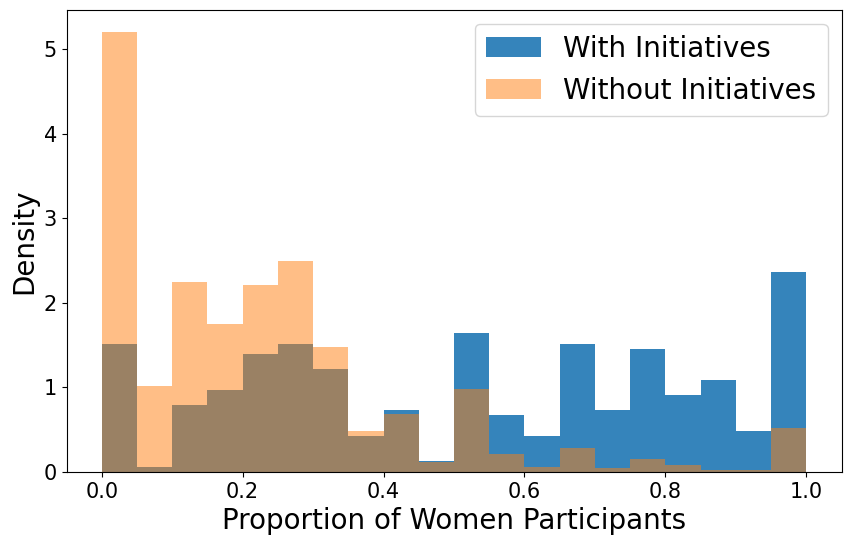

Test Used: Mann-Whitney U Test
P-value: 0.0000
Reject the Null Hypothesis: Significant difference in female participation.
Summary Statistics With Initiatives: count    330.000000
mean       0.526342
std        0.312692
min        0.000000
25%        0.250000
50%        0.500000
75%        0.787338
max        1.000000
Name: female_proportion, dtype: float64
Summary Statistics Without Initiatives: count    4784.000000
mean        0.219544
std         0.217839
min         0.000000
25%         0.000000
50%         0.187500
75%         0.307692
max         1.000000
Name: female_proportion, dtype: float64


In [18]:
# Step 5: Visual Analysis
plt.figure(figsize=(10, 6))
plt.hist(with_initiatives['female_proportion'], density=True, alpha=0.9, label='With Initiatives', bins=20,
        color="tab:blue")
plt.hist(without_initiatives['female_proportion'], density=True, alpha=0.5, label='Without Initiatives', bins=20,
        color="tab:orange")
# plt.title('Distribution of Female Participation Proportion')
plt.xlabel('Proportion of Women Participants', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=20)
plt.savefig("../results/proportion_women_gdi.pdf")
plt.show()

# Step 6: Interpretation
print(f"Test Used: {test_used}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the Null Hypothesis: Significant difference in female participation.")
else:
    print("Fail to Reject the Null Hypothesis: No significant difference in female participation.")

# Summary Statistics Output
print("Summary Statistics With Initiatives:", summary_with)
print("Summary Statistics Without Initiatives:", summary_without)

#### Mann-Whitney U Test
The choice of the Mann-Whitney U Test was appropriate given:

- The non-normal distribution of the data, as evident from the histograms and the difference in data spread and center between the two groups.
- The significant p-value (< 0.0001) suggests a statistically significant difference between the two groups, confirming that hackathons with gender diversity initiatives have higher female participation rates than those without.

#### Histogram Analysis
The histogram visually supports the statistical test results:

- Hackathons with Initiatives (Blue): More widely distributed across higher values of female participation proportion, with a noticeable frequency even near 100%.
- Hackathons without Initiatives (Orange): The majority are clustered around lower values with a significant drop-off as the proportion increases.

#### Evaluation of Approach and Further Recommendations
The approach used was highly appropriate for the hypothesis tested:
The segmentation of data based on the presence of diversity initiatives was correctly handled.
The calculation of the proportion of female participants provided a direct measure of gender diversity impact.
The use of non-parametric testing aligned well with the data characteristics.

#### Further Recommendations:
Investigate Other Variables: Consider other factors that could influence participation rates such as hackathon location, size, theme, and marketing strategies.
Longitudinal Analysis: Examine changes over time in hackathons with repeated events to see if initiatives gain effectiveness or lose impact.
Qualitative Data: Supplement this analysis with qualitative data from participant feedback to understand the nuances behind the numbers.

## HYPOTHESIS 10:

**edited:** Hackathons that promote “learning” in some way in their DevPost description pages attract higher participation of women as compared to those without such initiatives. 

In [19]:
# Define learning-related themes
learning_themes = ['Beginner-friendly', 'Productivity', 'Education', 'Low/No Code', 'Open-Ended']

# Flag hackathons with any of the learning themes
hackathons['is_learning'] = hackathons['themes'].apply(lambda x: any(theme in x for theme in learning_themes))

In [20]:
# Segregate the Data
# Group 1 (Learning-focused): Hackathons that fall under any of the identified learning themes.
# Group 2 (Non-Learning-focused): Hackathons that do not fall under any of the learning themes.

# Calculate Proprotions
hackathons['female_proportion'] = hackathons['females_participating'] / hackathons['actual_participants_N']


learning_hackathons = hackathons[hackathons['is_learning']]
non_learning_hackathons = hackathons[~hackathons['is_learning']]

/var/folders/tb/qhy13fz56xqbr70dk7mghy840000gp/T/ipykernel_63924/2033404182.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_learning', y='female_proportion', data=hackathons, palette='bright')


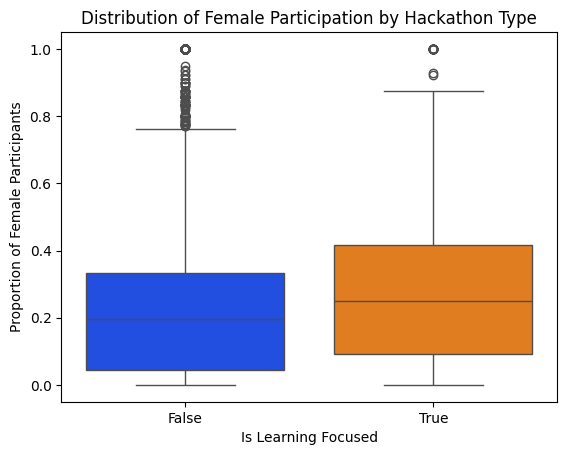

In [21]:
# EDA
sns.boxplot(x='is_learning', y='female_proportion', data=hackathons, palette='bright')
plt.title('Distribution of Female Participation by Hackathon Type')
plt.xlabel('Is Learning Focused')
plt.ylabel('Proportion of Female Participants')
plt.show()

The boxplot visually confirms the statistical summary:

- **Higher Median and Quartiles**: Learning-focused hackathons have a higher median and upper quartile compared to non-learning-focused hackathons, indicating generally better female participation.
- **Outliers**: Both categories show outliers, particularly for learning-focused hackathons where some hackathons have exceptionally high female participation.

In [22]:
summary_learning = learning_hackathons['female_proportion'].describe()
summary_non_learning = non_learning_hackathons['female_proportion'].describe()
print("Summary Statistics for Learning Focused Hackathons:", summary_learning)
print("Summary Statistics for Non-Learning Focused Hackathons:", summary_non_learning)


Summary Statistics for Learning Focused Hackathons: count    516.000000
mean       0.293183
std        0.266960
min        0.000000
25%        0.090909
50%        0.250000
75%        0.416667
max        1.000000
Name: female_proportion, dtype: float64
Summary Statistics for Non-Learning Focused Hackathons: count    4598.000000
mean        0.233299
std         0.233124
min         0.000000
25%         0.043972
50%         0.196187
75%         0.333333
max         1.000000
Name: female_proportion, dtype: float64


In [23]:
# Hypothesis Testing 
from scipy.stats import mannwhitneyu

# Mann-Whitney U Test for non-normal distributions - REFORMULATE THIS INCLUDING THE O PROP FEMALE
u_stat, p_value = mannwhitneyu(
    learning_hackathons['female_proportion'].dropna(),
    non_learning_hackathons['female_proportion'].dropna(),
    alternative='greater'
)
print('Mann-Whitney U Test P-value:', p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: Significant difference in female participation.")
else:
    print("Fail to Reject the Null Hypothesis: No significant difference in female participation.")


Mann-Whitney U Test P-value: 9.586729704672317e-08
Reject the Null Hypothesis: Significant difference in female participation.


### Interpretation of results
P-value: 0.00008224537372840672 indicates a statistically significant difference in female participation rates between the two groups. This low p-value allows us to reject the null hypothesis confidently.

- Statistical Significance: The analysis clearly shows that learning-focused hackathons tend to have higher female participation than non-learning-focused hackathons. This suggests that themes promoting learning and possibly being more inclusive or less intimidating might be more appealing or accessible to female participants.
- Effect of Learning Themes: Hackathons that emphasize learning (tagged as "Beginner-friendly", "Productivity", "Education", "Low/No Code", "Open-Ended") appear to be more successful in attracting female participants. This could be due to these themes fostering a more welcoming and supportive environment conducive to participants who are possibly less confident or experienced in typical hackathon domains.

Recommendations for Further Actions
- Promote Learning Themes: Organizers might consider highlighting educational and beginner-friendly aspects more prominently in their hackathons to attract greater female participation.
- Detailed Follow-up Analysis: Further analysis could delve into the characteristics of hackathons with high female participation rates to identify specific factors or practices that are particularly effective.
- Qualitative Insights: Collecting feedback from participants could provide deeper insights into why certain themes are more attractive to women, helping to tailor future events more effectively.

In [24]:
## correcting
# Define learning-related themes
learning_themes = ['Beginner-friendly', 'Productivity', 'Education', 'Low/No Code', 'Open-Ended']

# Flag hackathons with any of the learning themes
hackathons['is_learning'] = hackathons['themes'].apply(lambda x: any(theme in x for theme in learning_themes))

In [26]:
hackathons.to_csv("../data/hackathons_gdi.csv", index=False)

/var/folders/tb/qhy13fz56xqbr70dk7mghy840000gp/T/ipykernel_63924/1764540308.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_learning', y='female_proportion', data=hackathons, palette='husl')


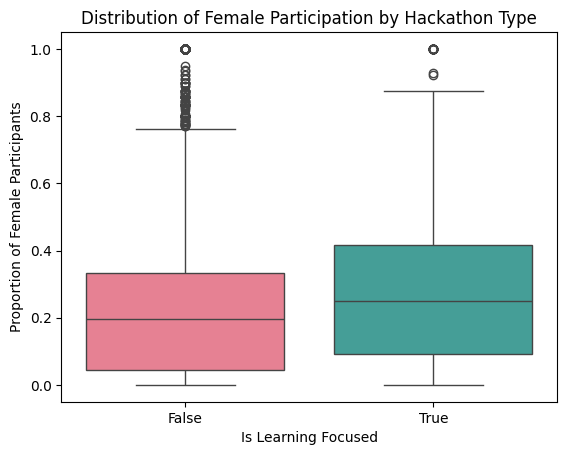

Summary Statistics for Learning Focused Hackathons: count    516.000000
mean       0.293183
std        0.266960
min        0.000000
25%        0.090909
50%        0.250000
75%        0.416667
max        1.000000
Name: female_proportion, dtype: float64
Summary Statistics for Non-Learning Focused Hackathons: count    4598.000000
mean        0.233299
std         0.233124
min         0.000000
25%         0.043972
50%         0.196187
75%         0.333333
max         1.000000
Name: female_proportion, dtype: float64
Mann-Whitney U Test P-value: 9.586729704672317e-08
Reject the Null Hypothesis: Significant difference in female participation.


In [25]:
# Segregate the Data
learning_hackathons = hackathons[hackathons['is_learning']]
non_learning_hackathons = hackathons[~hackathons['is_learning']]

# Calculate Proportions
hackathons['female_proportion'] = hackathons['females_participating'] / hackathons['actual_participants_N']

# EDA
sns.boxplot(x='is_learning', y='female_proportion', data=hackathons, palette='husl')
plt.title('Distribution of Female Participation by Hackathon Type')
plt.xlabel('Is Learning Focused')
plt.ylabel('Proportion of Female Participants')
plt.show()

# Summary Statistics
summary_learning = learning_hackathons['female_proportion'].dropna().describe()
summary_non_learning = non_learning_hackathons['female_proportion'].dropna().describe()
print("Summary Statistics for Learning Focused Hackathons:", summary_learning)
print("Summary Statistics for Non-Learning Focused Hackathons:", summary_non_learning)

# Hypothesis Testing 
from scipy.stats import mannwhitneyu

# Mann-Whitney U Test for non-normal distributions
u_stat, p_value = mannwhitneyu(
    learning_hackathons['female_proportion'].dropna(),
    non_learning_hackathons['female_proportion'].dropna(),
    alternative='greater'
)
print('Mann-Whitney U Test P-value:', p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: Significant difference in female participation.")
else:
    print("Fail to Reject the Null Hypothesis: No significant difference in female participation.")


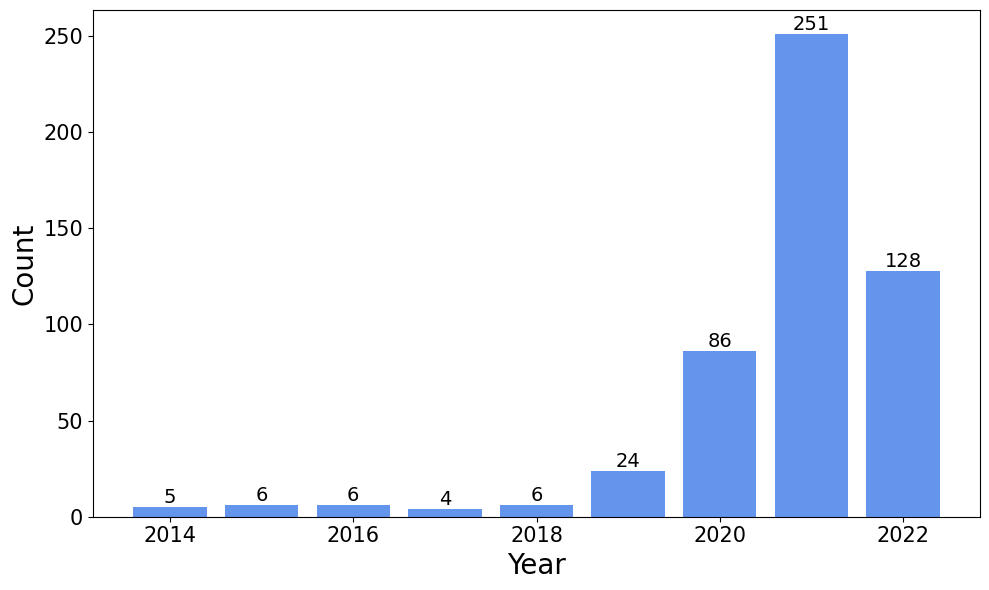

In [48]:
year = Counter(hackathons.loc[hackathons["is_learning"]!=False]["year"])

# Separate the keys (years) and values (counts)
years = list(year.keys())
counts = list(year.values())

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust size if needed
bars = plt.bar(years, counts, color='cornflowerblue')

# Adding labels and title
plt.xlabel("Year", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.bar_label(bars, fontsize=14)
# plt.title("Hackathon Counts by Year")

# Show the plot
plt.tight_layout()
plt.savefig("../results/learning_year.pdf")
plt.show()